## Problem Statement


A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

## Add table of contents

### Subtask:
Create a markdown cell at the beginning of the notebook with a table of contents using markdown headers.


**Reasoning**:
Create a markdown cell at the beginning of the notebook with a table of contents using markdown headers.



In [ ]:
# Table of Contents

## Problem Statement

## Data Loading and Merging

## Basic EDA

## Data Cleaning and Preparation

## Feature Engineering

## Visualization

## Model Training


In [ ]:
import numpy as np # Importing numpy for numerical operations
import pandas as pd # Importing pandas for data manipulation and analysis
import matplotlib.pyplot as plt # Importing matplotlib.pyplot for plotting
import seaborn as sns # Importing seaborn for statistical data visualization


**Reasoning**:
Add comments to the code cell that loads the training data.



In [ ]:
#importing the dataset
df_train = pd.read_csv('/content/train.csv') # Load the training dataset from the specified path
df_train.head() # Display the first few rows of the training DataFrame

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


**Reasoning**:
Add a comment to the code cell that explains the goal of the project.



In [ ]:
# we have to predict the purchase capacity by trainning the model
# This cell reiterates the main objective of the project: predicting purchase amount through model training.

**Reasoning**:
Add comments to the code cell that loads the test data.



In [ ]:
## import the test data
df_test=pd.read_csv('/content/test.csv') # Load the test dataset from the specified path
df_test.head() # Display the first few rows of the test DataFrame

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


**Reasoning**:
Add comments to the code cell that merges the train and test dataframes.



In [ ]:
# merge both test and train the data
df=pd.concat([df_test,df_train]) # Concatenate the test and train DataFrames
df.head() # Display the first few rows of the merged DataFrame

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0,NaN


**Reasoning**:
Add comments to the code cell that displays basic information about the dataframe.



In [ ]:
## basic code eda
# Display information about the DataFrame, including column data types and non-null counts.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


**Reasoning**:
Add a comment to the code cell that displays descriptive statistics of the dataframe.



In [ ]:
# Display descriptive statistics for the numerical columns in the DataFrame.
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


**Reasoning**:
Add comments to the code cell that drops the 'User_ID' column.



In [ ]:
# Drop the 'User_ID' column as it is not relevant for the model training.
df.drop(['User_ID'],axis=1,inplace=True)

**Reasoning**:
Add a comment to explain the purpose of `pd.get_dummies(df['Gender'])`.



In [ ]:
# Generate dummy variables for the 'Gender' column.
pd.get_dummies(df['Gender'])

,F,M
0,False,True
1,False,True
2,True,False
3,True,False
4,True,False
...,...,...
550063,False,True
550064,True,False
550065,True,False
550066,True,False


**Reasoning**:
Add a comment to explain the mapping of 'Gender' to numerical values.



In [ ]:
## handling categorial table Gender
# Map 'F' to 0 and 'M' to 1 in the 'Gender' column for numerical representation.
df['Gender']=df['Gender'].map({'F':0,'M':1})
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00128942,1,46-50,7,B,2,1,1,11.0,NaN,NaN
1,P00113442,1,26-35,17,C,0,0,3,5.0,NaN,NaN
2,P00288442,0,36-45,1,B,4+,1,5,14.0,NaN,NaN
3,P00145342,0,36-45,1,B,4+,1,4,9.0,NaN,NaN
4,P00053842,0,26-35,1,C,1,0,4,5.0,12.0,NaN


**Reasoning**:
Add a comment to explain the purpose of `df['Age'].unique()`.



In [ ]:
# Display the unique values in the 'Age' column to understand the different age categories present.
df['Age'].unique()

array(['46-50', '26-35', '36-45', '18-25', '51-55', '55+', '0-17'],
      dtype=object)

**Reasoning**:
Add a comment to explain the purpose of `pd.get_dummies(df['Age'],drop_first=True)`.



In [ ]:
# Generate dummy variables for the 'Age' column, dropping the first category to avoid multicollinearity.
#pd.get_dummies(df['Age'],drop_first=True)

**Reasoning**:
Add a comment to explain the mapping of 'Age' to numerical values.



In [ ]:
# Map the 'Age' ranges to numerical values for easier processing.
df['Age']=df['Age'].map({'0-17':1,'18-25':2,'26-35':3, '36-45':4 , '46-50':5 , '51-55':6 , '55+':7})

**Reasoning**:
Add a comment to explain the purpose of `df['Age'].head(3)`.



In [ ]:
# Display the first 3 values of the mapped 'Age' column to verify the transformation.
df['Age'].head(3)

,Age
0,5
1,3
2,4


**Reasoning**:
Add comments to explain the use of `LabelEncoder` for the 'Age' column.



In [ ]:
from sklearn import preprocessing

# Initialize LabelEncoder
label_encoder = preprocessing.LabelEncoder()
# Fit and transform the 'Age' column using LabelEncoder to encode categorical labels into numerical labels.
df['Age']= label_encoder.fit_transform(df['Age'])

# Display the unique values in the transformed 'Age' column.
df['Age'].unique()

array([4, 2, 3, 1, 5, 6, 0])

**Reasoning**:
Add comments to explain the creation of dummy variables for 'City_Category'.



In [ ]:
# Fixing categorical City_category
# Create dummy variables for the 'City_Category' column, dropping the first category to avoid multicollinearity.
df_city=pd.get_dummies(df['City_Category'],drop_first=True)
df_city.head()

,B,C
0,True,False
1,False,True
2,True,False
3,True,False
4,False,True


**Reasoning**:
Add comments to the code cells that concatenate the dummy variables for 'City_Category' with the main DataFrame, drop the original 'City_Category' column, display the head of the DataFrame, and check for null values.



In [ ]:
# Concatenate the dummy variables for 'City_Category' with the main DataFrame.
df=pd.concat([df,df_city],axis=1)
# Drop the original 'City_Category' column as it's no longer needed after creating dummy variables.
df.drop('City_Category',axis=1,inplace=True)
# Display the first few rows of the DataFrame to verify the changes.
df.head(2)
# Check for null values in each column of the DataFrame.
df.isnull().sum()

,0
Product_ID,0
Gender,0
Age,0
Occupation,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category_1,0
Product_Category_2,245982
Product_Category_3,545809
Purchase,233599


**Reasoning**:
Add comments to the code cells that display value counts for 'Product_Category_2', fill missing values in 'Product_Category_2' with the mode, check for null values in 'Product_Category_2', and fill missing values in 'Product_Category_3' with the mode.



In [ ]:
## Focus on Replacing missing values
# Display the value counts for 'Product_Category_2' to understand the distribution of categories and identify the mode.
df['Product_Category_2'].value_counts()
## Replace the missing values with mode
# Fill the missing values in 'Product_Category_2' with the mode of the column.
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])
# Check for null values in 'Product_Category_2' after filling to confirm that missing values have been handled.
df['Product_Category_2'].isnull().sum()
## Replace the missing values with mode
# Fill the missing values in 'Product_Category_3' with the mode of the column.
df['Product_Category_3']=df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

**Reasoning**:
Add comments to the remaining code cells as per the instructions.



In [ ]:
# Check for null values in 'Product_Category_3' after filling to confirm that missing values have been handled.
df['Product_Category_3'].isnull().sum()
# Display the unique values in the 'Stay_In_Current_City_Years' column to understand the different categories.
df['Stay_In_Current_City_Years'].unique()
# Remove the '+' sign from the 'Stay_In_Current_City_Years' column using string replacement.
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+', ' ', regex=False)
# Display the first few values of the 'Stay_In_Current_City_Years' column to verify the change.
df['Stay_In_Current_City_Years'].head()
## Convert onject into integer
# Convert the 'Stay_In_Current_City_Years' column to integer type.
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)
# Display the info of the DataFrame to check the data types after conversion.
df.info()
# Convert the boolean columns 'B' and 'C' (created from City_Category) to integer type (0 or 1).
df['B']=df['B'].astype(int)
df['C']=df['C'].astype(int)
# Display the info of the DataFrame again to check the data types after converting 'B' and 'C'.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int64  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  bool   
 11  C                           783667 non-null  bool   
dtypes: bool(2), float64(3), int64(6), object(1)
memory usage: 67.3+ MB
<class 'pa

**Reasoning**:
Add comments to the remaining code cells as per the instructions.



<Axes: xlabel='C', ylabel='Count'>

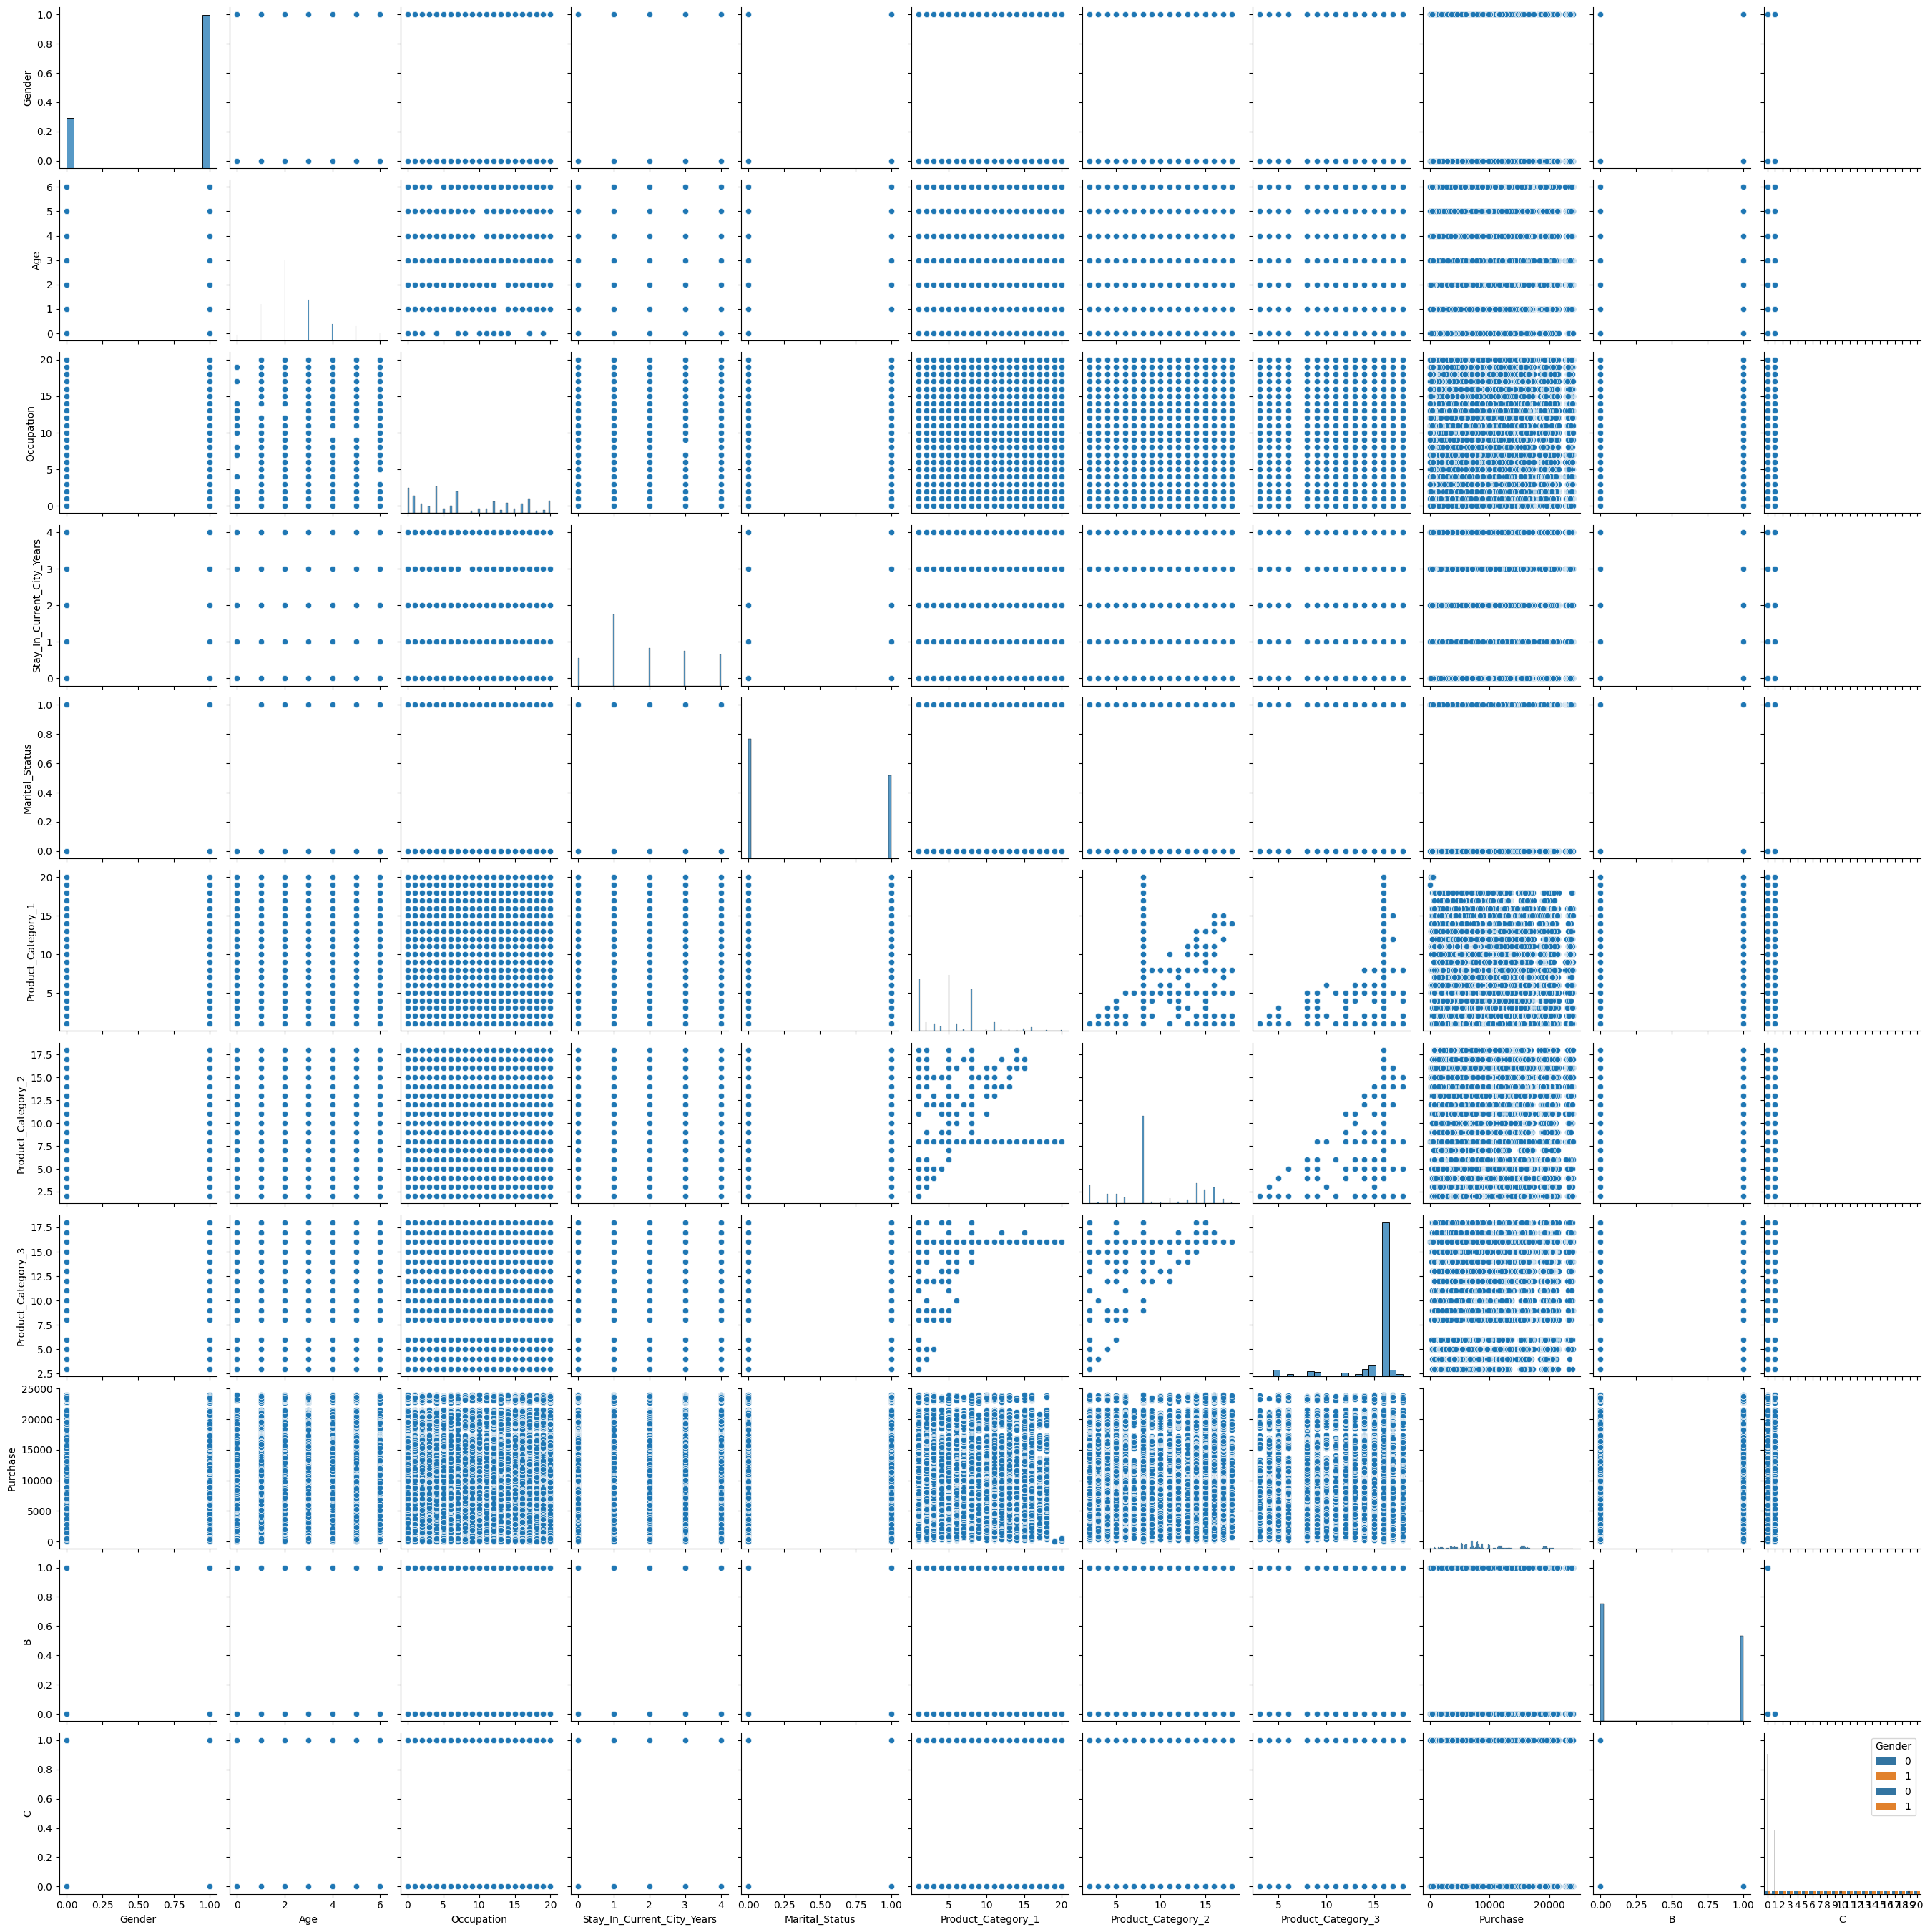

In [ ]:
## Visualiazation

# Generate a pairplot to visualize the relationships between numerical features in the dataset.
sns.pairplot(data=df)
## Visualization: Purchase Amount by Age and Gender
# This bar plot visualizes the relationship between Age, Purchase amount, and Gender.
sns.barplot(x='Age',y='Purchase',hue='Gender',data=df)
## Purchasing of men is higher than women
# This markdown cell provides an observation based on the previous visualization.
## visualization with purchase and occupattions
# This markdown cell introduces the next visualization focusing on purchase and occupation.
# This bar plot visualizes the relationship between Occupation, Purchase amount, and Gender.
sns.barplot(x='Occupation',y='Purchase',hue='Gender',data=df)